# Predicción de la longitud del sépalo en función de la anchura del pétalo 

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [80]:
session = tf.Session()
iris = datasets.load_iris()

In [81]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

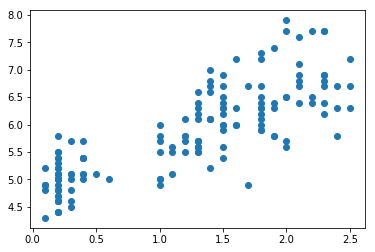

In [82]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [83]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [84]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [85]:
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [86]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[2.5116367]], b=[[2.2659996]], Loss = 1.7913688
Paso #20, A=[[2.2160008]], b=[[2.6791067]], Loss = 1.2641113
Paso #30, A=[[1.9568421]], b=[[3.0448434]], Loss = 1.0770512
Paso #40, A=[[1.8191936]], b=[[3.401771]], Loss = 0.6761308
Paso #50, A=[[1.6276863]], b=[[3.6836643]], Loss = 0.7855916
Paso #60, A=[[1.4394523]], b=[[3.8620288]], Loss = 0.54108185
Paso #70, A=[[1.3633101]], b=[[4.0872245]], Loss = 0.24225746
Paso #80, A=[[1.2416232]], b=[[4.199918]], Loss = 0.30349898
Paso #90, A=[[1.1818763]], b=[[4.3249297]], Loss = 0.31521794
Paso #100, A=[[1.116414]], b=[[4.427559]], Loss = 0.22865386


In [87]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [88]:
print(str(slope)+"x+"+str(intercept))

1.116414x+4.427559


In [89]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

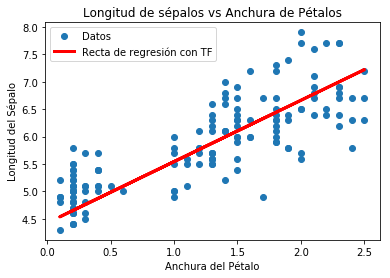

In [90]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

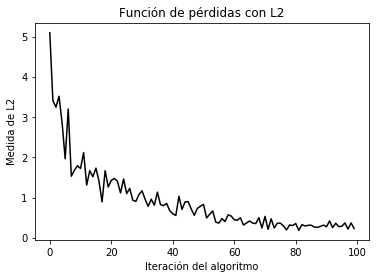

In [91]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [92]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [93]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [94]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [95]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [96]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[0.11131098]], b=[[-0.6166655]], Loss = 6.5052824
Paso #20, A=[[0.745311]], b=[[-0.11666541]], Loss = 5.2088118
Paso #30, A=[[1.3621111]], b=[[0.3833346]], Loss = 3.645921
Paso #40, A=[[1.953711]], b=[[0.8833347]], Loss = 2.4952865
Paso #50, A=[[2.463911]], b=[[1.3593347]], Loss = 1.7854251
Paso #60, A=[[2.6689112]], b=[[1.6833347]], Loss = 1.451252
Paso #70, A=[[2.650111]], b=[[1.8753349]], Loss = 1.3047298
Paso #80, A=[[2.623511]], b=[[2.0793347]], Loss = 1.3016106
Paso #90, A=[[2.6219113]], b=[[2.2873347]], Loss = 1.1826237
Paso #100, A=[[2.4891114]], b=[[2.4153347]], Loss = 1.2446357


In [97]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [98]:
print(str(slope)+"x+"+str(intercept))

2.4891114x+2.4153347


In [99]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

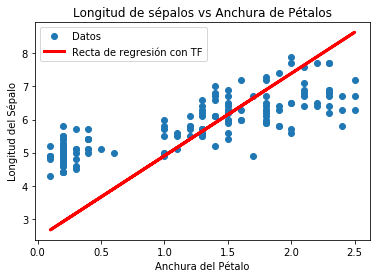

In [100]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

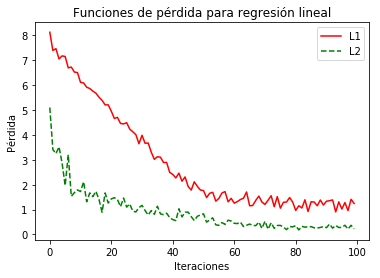

In [101]:
plt.plot(loss_vect_l1, 'r-', label = "L1")
plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funciones de pérdida para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend(loc = "upper right")
plt.show()